This notebook explores how their kde ebm package works. 

In [11]:
# Authors: Nicholas C. Firth <ncfirth87@gmail.com>
# License: TBC
from kde_ebm import mixture_model
from kde_ebm import mcmc
from kde_ebm import plotting
from kde_ebm import datasets
from matplotlib import pyplot as plt

/var/folders/wx/xz5y_06d15q5pgl_mhv76c8r0000gn/T/ipykernel_33316/2254532708.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
100%|██████████| 500/500 [00:00<00:00, 3713.97it/s]
/var/folders/wx/xz5y_06d15q5pgl_mhv76c8r0000gn/T/ipykernel_33316/2254532708.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


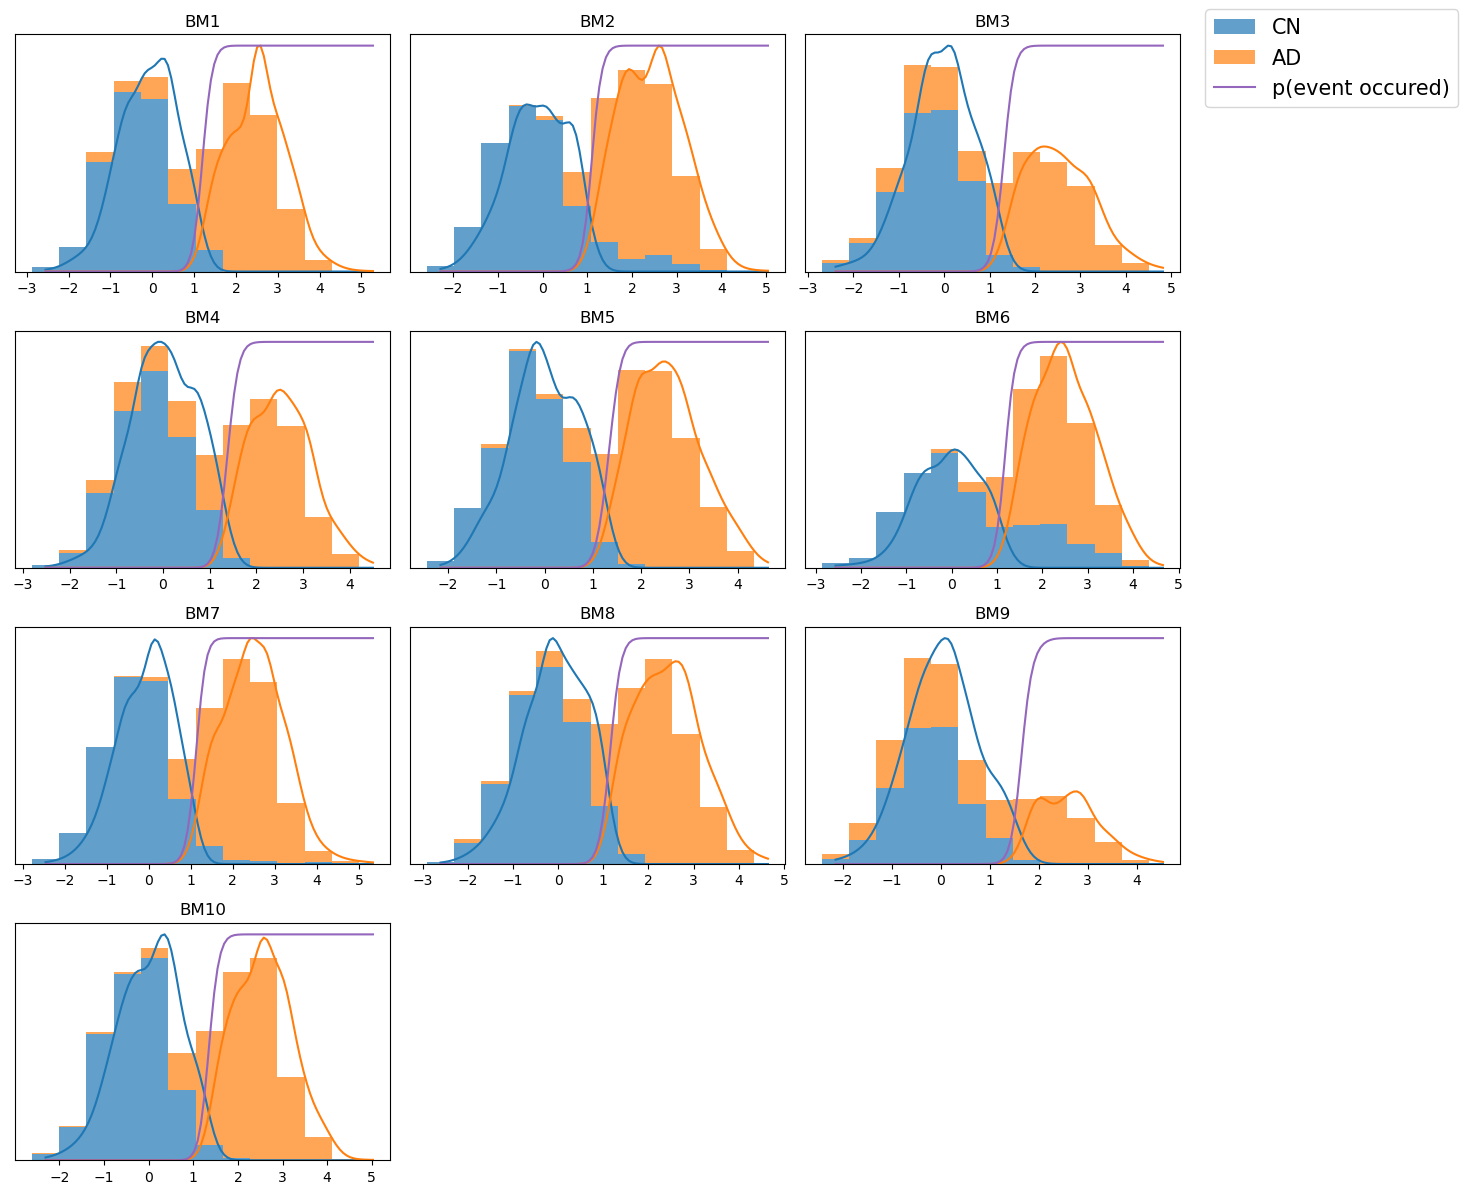

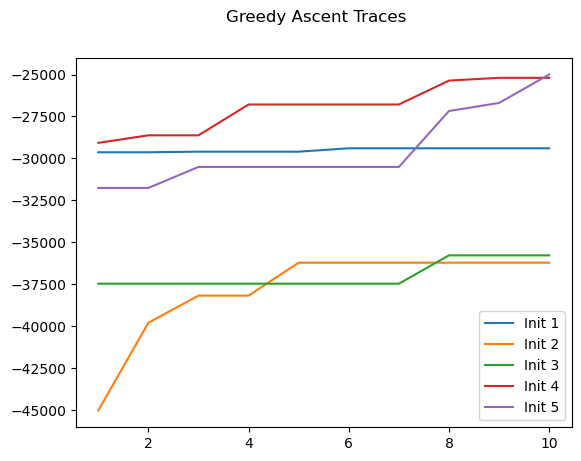

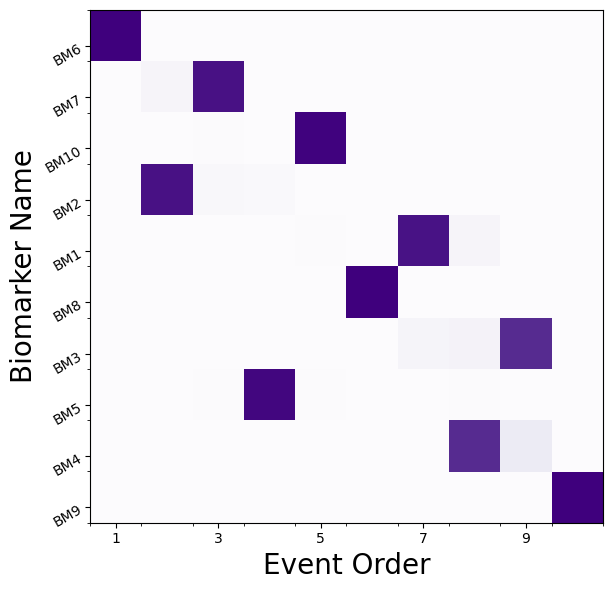

In [12]:
X, y, bmname, cname = datasets.load_synthetic('synthetic_1500_10.csv')

# Fit GMM for each biomarker and plot the results
mixture_models = mixture_model.fit_all_kde_models(X, y)
fig, ax = plotting.mixture_model_grid(X, y, mixture_models,
                                        score_names=bmname,
                                        class_names=cname)
fig.show()

# Now we fit our disease sequence, using greedy ascent followed by
# MCMC optimisation
res = mcmc.mcmc(X, mixture_models, n_iter=500,
                greedy_n_iter=10, greedy_n_init=5)

# Then plot these using a positional variance diagram to visualise
# any uncertainty in the sequence
fig, ax = plotting.mcmc_uncert_mat(res, score_names=bmname)
fig.show()

In [13]:
# res.sort(reverse=True)
ml_order = res[0]

In [14]:
ml_order.ordering

array([5, 6, 9, 1, 0, 7, 2, 4, 3, 8])

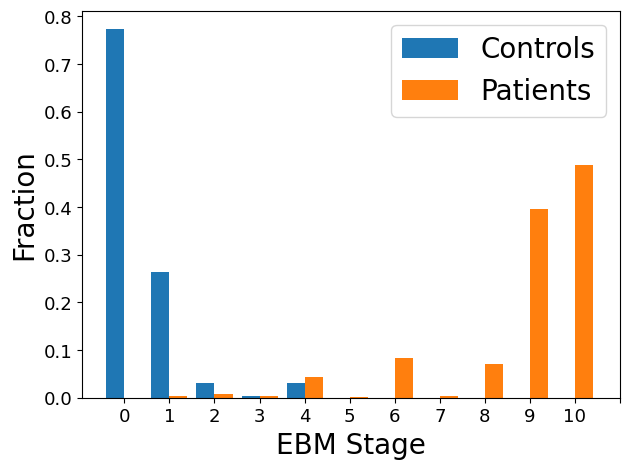

In [15]:
# Finally we can stage all our participants using the fitted EBM
prob_mat = mixture_model.get_prob_mat(X, mixture_models)
stages, stages_like = ml_order.stage_data(prob_mat)

fig, ax = plotting.stage_histogram(stages, y, )
plt.show()